<a href="https://colab.research.google.com/github/LA1007/Capstone/blob/main/Capstone_Assignment_Software_Technology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ST1/ST1G Assignment 9 (Capstone Programming Project)** - Wai/Leo and Nick

In [ ]:
## Links google drive to colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


# Step 1: Reading the data Reading the data with python


In [ ]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

# Reading the dataset
# Creates the dataframe Starbucks_Stock_Price
import matplotlib.pyplot
import pandas as pd
import numpy as np
Starbucks_Stock_Price=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SBUX.US_D1.csv', encoding='latin')
print('Shape before deleting duplicate values:', Starbucks_Stock_Price.shape)

# Removing duplicate rows if there are any
Starbucks_Stock_Price=Starbucks_Stock_Price.drop_duplicates()
print('Shape After deleting duplicate values:', Starbucks_Stock_Price.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
Starbucks_Stock_Price.head(10) # first 10 rows
# print(Starbucks_Stock_Price.to_string(index=False)) whole table

Shape before deleting duplicate values: (6639, 6)
Shape After deleting duplicate values: (6639, 6)


,datetime,open,high,low,close,volume
0,1998-01-02,38.38,38.63,37.31,37.50,594000
1,1998-01-05,37.63,37.78,36.75,37.13,644000
2,1998-01-06,37.13,37.38,35.56,35.63,1183300
3,1998-01-07,35.50,36.44,34.25,34.69,2039005
4,1998-01-08,34.56,36.01,34.00,35.76,1638105
5,1998-01-09,35.75,36.01,34.37,35.13,713703
6,1998-01-12,34.50,35.37,34.25,35.19,855603
7,1998-01-13,35.38,35.63,35.00,35.56,460200
8,1998-01-14,35.63,35.63,35.07,35.19,336200
9,1998-01-15,35.13,35.26,33.75,34.00,742700


## Observations about the data

File contains 6640 rows of data, with 6 attributes:
- datetime - The recording date of this record
- open - A number of open value in a daily stock market
- high - A number of highest value in a daily stock market
- low - A number of lowest value in a daily stock market
- close - A number of closed value in a daily stock market
- volume - A number of shares traded in a stock or contracts traded in futures or options


# Step 2: Problem statement definition
- Creating a prediction model to predict the value(close) of a stock($)
- Target Variables: 'close' Predictors/Features: datetime, open, high, low, volume

# Step 3: Choosing the appropriate ML/AI Algorithm for Data Analysis
As the target variable (close) is a Continous varible we will use a ML Regression model in creating the prediction model


# Step 4: Looking at the class distribution (Target variable distribution to check if the data is balanced or skewed)

Text(0, 0.5, 'Number of days')

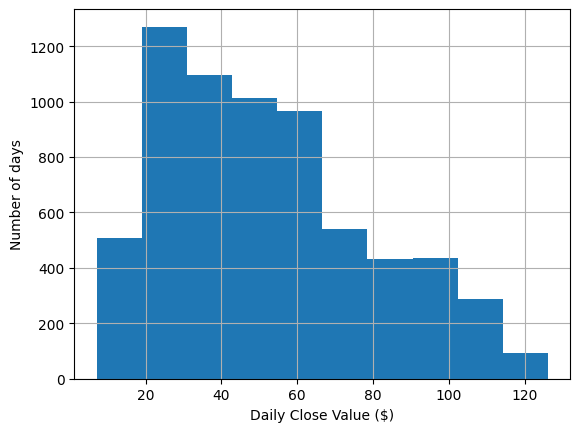

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the close values
Starbucks_Stock_Price['close'].hist()
plt.xlabel("Daily Close Value ($)")
plt.ylabel("Number of days")

## Observations from Step 4

The data distribution of the target variable is satisfactory to proceed further.
There are sucient number of rows for each type of values to learn from.

# Step 5: Basic Exploratory Data Analysis

In [ ]:
Starbucks_Stock_Price.head()

,datetime,open,high,low,close,volume
0,1998-01-02,38.38,38.63,37.31,37.50,594000
1,1998-01-05,37.63,37.78,36.75,37.13,644000
2,1998-01-06,37.13,37.38,35.56,35.63,1183300
3,1998-01-07,35.50,36.44,34.25,34.69,2039005
4,1998-01-08,34.56,36.01,34.00,35.76,1638105


In [ ]:
Starbucks_Stock_Price.tail()

,datetime,open,high,low,close,volume
6634,2024-03-08,90.95,91.53,90.60,91.07,5115057
6635,2024-03-09,91.06,91.09,91.05,91.05,4882
6636,2024-03-11,91.26,92.96,91.17,92.07,3796900
6637,2024-03-12,92.00,92.72,91.21,92.42,6207319
6638,2024-03-13,92.55,92.87,90.87,91.59,4772185


In [ ]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
Starbucks_Stock_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6639 entries, 0 to 6638
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  6639 non-null   object 
 1   open      6639 non-null   float64
 2   high      6639 non-null   float64
 3   low       6639 non-null   float64
 4   close     6639 non-null   float64
 5   volume    6639 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 311.3+ KB


In [ ]:
# Looking at the descriptive statistics of the data
Starbucks_Stock_Price.describe(include='all')

,datetime,open,high,low,close,volume
count,6639,6639.000000,6639.000000,6639.000000,6639.000000,6.639000e+03
unique,6639,NaN,NaN,NaN,NaN,NaN
top,2024-03-13,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,52.025905,52.605072,51.438399,52.034272,5.793768e+06
std,NaN,27.161870,27.312972,26.994025,27.155434,4.658699e+06
min,NaN,7.520000,7.900000,7.060000,7.200000,3.000000e+02
25%,NaN,29.735000,30.130000,29.290000,29.665000,2.875130e+06
50%,NaN,49.340000,50.000000,48.660000,49.400000,4.693841e+06
75%,NaN,71.500000,72.215000,70.680000,71.390000,7.301760e+06


In [ ]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuou
Starbucks_Stock_Price.nunique()

,0
datetime,6639
open,4356
high,4370
low,4301
close,4417
volume,6623



# Observations from Step 5 - Basic Exploratory Data Analysis


- datetime - Continuous. Selected.
- open - Continuous. Selected.
- high - Continuous. Selected.
- low - Continuous. Selected.
- close - Continuous. Selected. Target variable.
- volume - Continuous. Selected.

# Step 7: Removing Unwanted columns

* There are a qualitative columns in the data.

* datetime removed.

# Step 8: Visual Exploratory Data Analysis

 As all our remaining 4 predictor variables are continous variables, so step 8 we analyse no variables instead analysing them all in step 9.

In [ ]:
# # Plotting multiple bar charts at once for categorical variables
# # Since there is no default function which can plot bar charts for multiple columns at once
# # we are defining our own function for the same
# def PlotBarCharts(inpData, colsToPlot, bin_width):
#     %matplotlib inline
#     import matplotlib.pyplot as plt

#     # Generating multiple subplots
#     fig, subPlot = plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
#     fig.suptitle('Bar charts of: '+ str(colsToPlot))

#     for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
#         # Setting bins and counting values in each bin
#         bins = range(0, int(max(inpData[colName])) + bin_width, bin_width)
#         binned_data = pd.cut(inpData[colName], bins=bins).value_counts().sort_index()

#         # Plotting bar chart
#         ax = binned_data.plot(kind='bar', ax=subPlot[plotNumber])

#         # Setting x-axis ticks and labels
#         ax.set_xticks(range(len(binned_data)))
#         ax.set_xticklabels([f'{bin.left}-{bin.right}' for bin in binned_data.index], rotation=45, ha='right')
#         ax.set_xlabel(colName)
#         ax.set_ylabel('Count')

# # Setting bin width
# bin_width = 20

# PlotBarCharts(inpData=Starbucks_Stock_Price, colsToPlot=['open','close'], bin_width=bin_width)


#Step 9: Now Visualize distribution of all the Continuous Predictor variables in the data using

Based on the Basic Exploratory Data Analysis, there are 5 continuous predictor variables 'open', 'high', 'low' and 'volume'.

array([[<Axes: title={'center': 'open'}>,
        <Axes: title={'center': 'high'}>],
       [<Axes: title={'center': 'low'}>,
        <Axes: title={'center': 'volume'}>]], dtype=object)

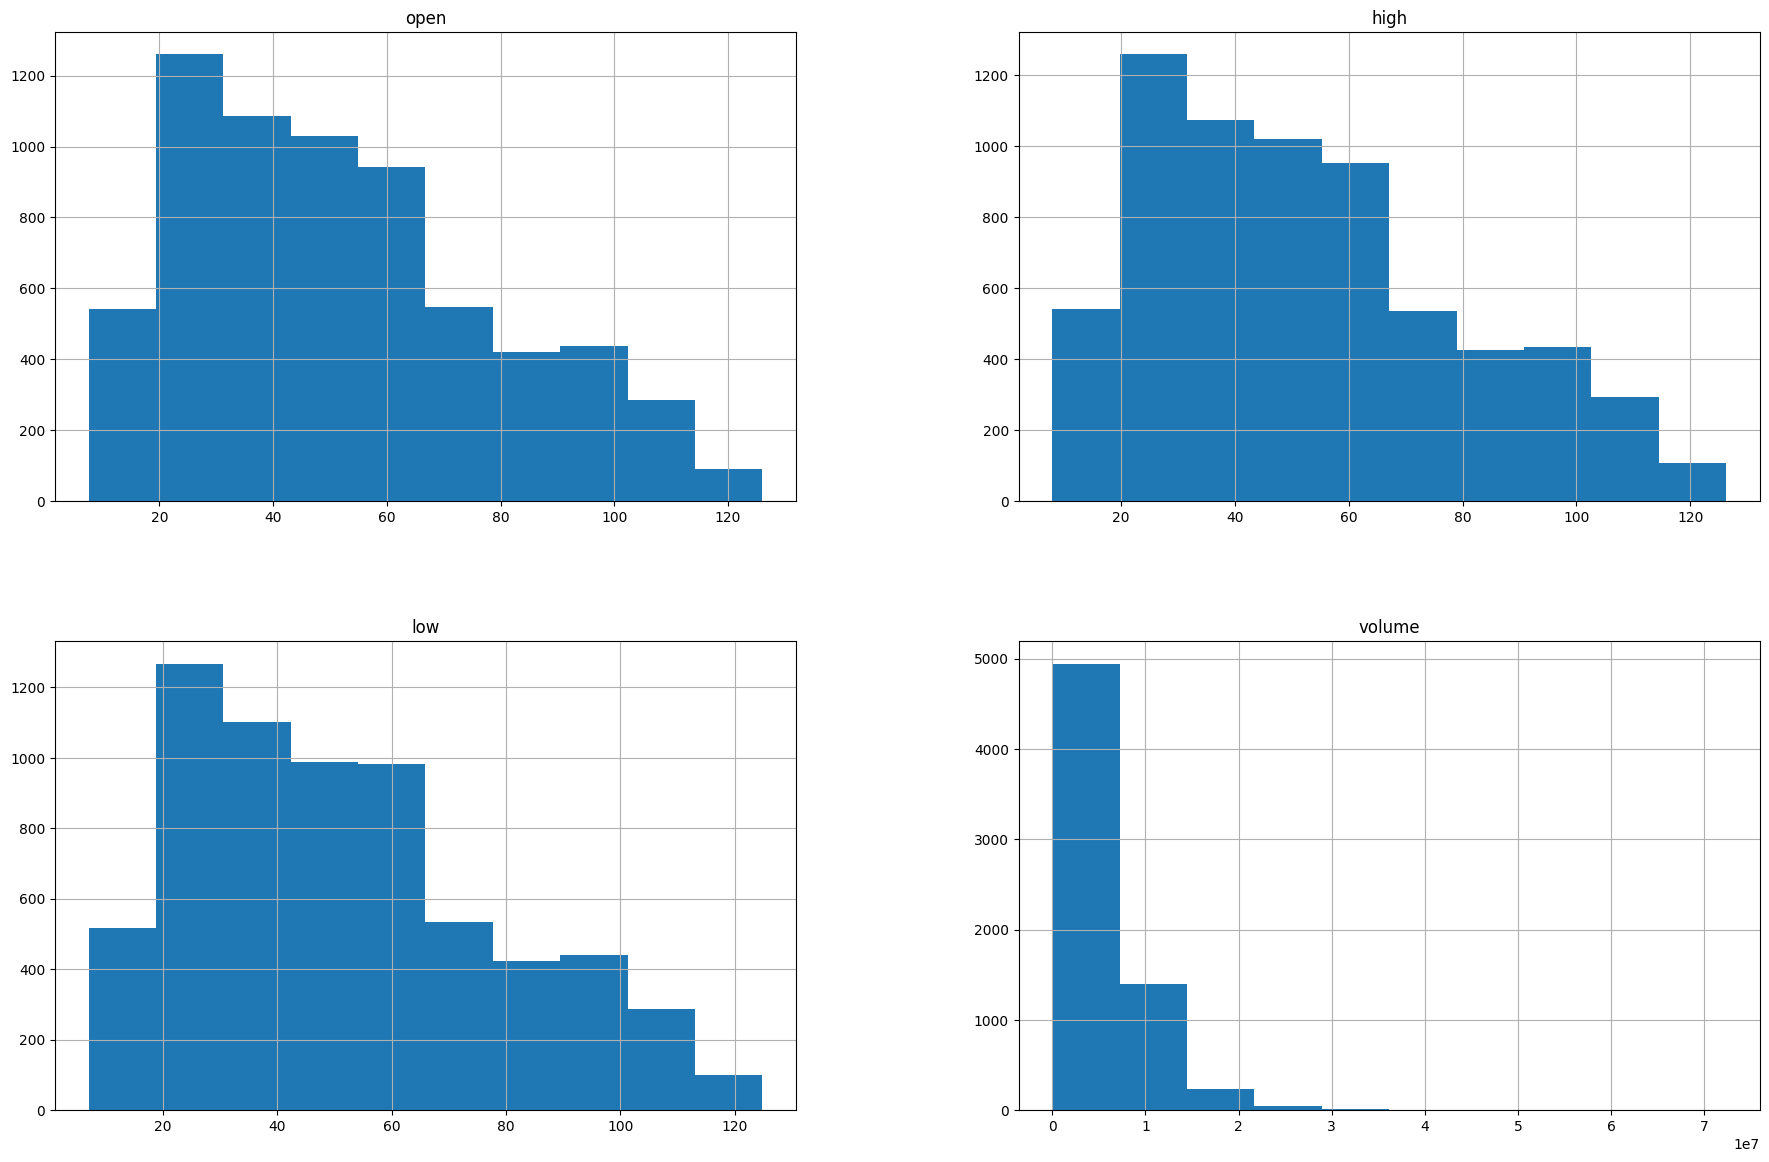

In [ ]:
# Plotting histograms of multiple columns together
Starbucks_Stock_Price.hist(['datetime', 'open', 'high', 'low', 'volume'], figsize=(22,14))



# fig = plt.figure(figsize =(18,18))
# ax=fig.gca()
# Starbucks_Stock_Price.hist(ax=ax,bins =30)
# plt.show()


# Array method is not working

# array([
#     [<Axes: title={'center': 'open'}>, <Axes: title={'center': 'high'}>],
#     [<Axes: title={'center': 'low'}>, <Axes: title={'center': 'volume'}>],
# ], dtype=object)

### Observations from step 9

Selected Continous variables:

- datetime: Selected. Unable to viewed (Numpy not accepting date as valid continous variable) we suspect this is due to each datetime value being a unique date rather than a number (The graph will be completely flat, each row has a unique value). However, we will keep this variable as the date has correlational relationship with a stock's price
- open: Selected. The distribution is good.
- high: Selected. The distribution is good.
- low: Selected. The distribution is good.
- volume: Selected. The graph indicates there are Outlier values beyond the data range 3.5 which represents 3.5e 7(35,000,000).


<!-- the graph doesn't seem to be accrutly displaying the range of the 'volume' data set which we know from Step 5: Basic Exploratory Data Analysis is from 300.000000e+02(330) to 7.234445e+07(72,344,450) transactions not 0 to 7. So it can't be determined via the chart if in volume has large outliers, as it is unclear how numpy is sorting them into the 1 to 7 columns. -->


# Step 10: Outlier Analysis

### Intitial confusion of the 'volume' bar chart
When we originally eximaed the graph and data description of step 9 it was unclear what the x axis of the 'volume' chart represented as it had a range 0 to 7, however we knew from the data description in step 5 that the range of the 'volume' data variable were from 3.000000e+02(300) to 7.234445e+07(72,344,450). However, on closer anaylsis we have realised the volume chart had a scientific notation '1e7', this resolved our intially confusion of the 'volume's chart x axis most data varibles in the chart are less than 1 which makes logical sense as the data description showed most variables where smaller than 1e7(10,000,000).

From this we can now see that volume has outliers (values > 35,000,000(Not values > 4)) which need to be treated.

### Steps to treat identified outlier data

Find and impute outlier variables with a logical buisness value.

In [ ]:
# The dataset desciption
# Starbucks_Stock_Price.describe(include='all')


# Finding nearest value to maxium outlier'volume' (35,000,000)
Starbucks_Stock_Price['volume'][Starbucks_Stock_Price['volume']<35000000].sort_values(ascending=False)

,volume
6404,13985032
6603,13985032
2337,13985032
2330,13985032
2321,13985032
...,...
6600,2928
6618,2798
6548,2442
6589,1865


In [ ]:
# Replacing outliers with the nearest possibe value
Starbucks_Stock_Price['volume'][Starbucks_Stock_Price['volume']>35000000] =33729652

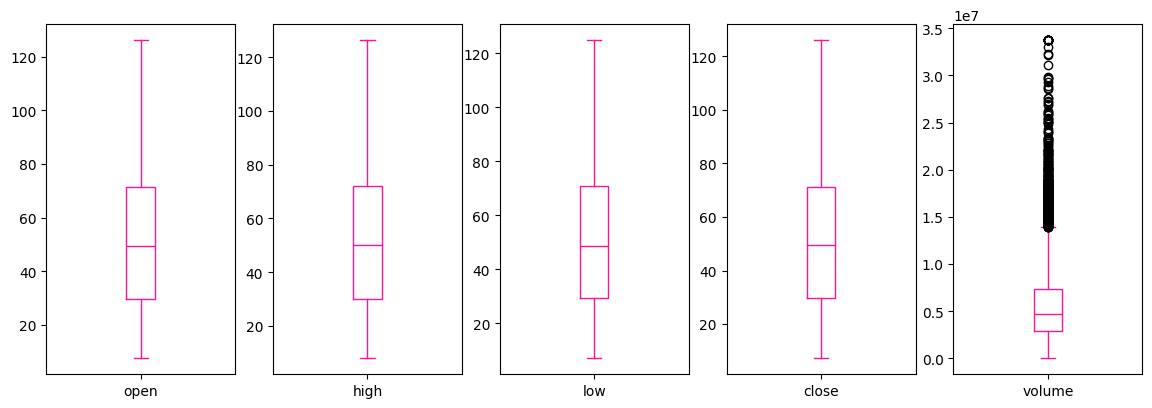

In [ ]:
#check if outliers got removed
Starbucks_Stock_Price.plot(kind='box', subplots=True,
        layout=(2,7),sharex=False,sharey=False, figsize=(20, 10), color='deeppink');

Through the use of boxplots we can now actually see our 'volume' dataset still contains outliers after cleaning all values above 35,000,000. It suggests we should at least clean all variables above 14,000,000.

In [ ]:
# The dataset desciption
# Starbucks_Stock_Price.describe(include='all')


# Finding nearest value to maxium outlier'volume' (14,000,000)
Starbucks_Stock_Price['volume'][Starbucks_Stock_Price['volume']<14000000].sort_values(ascending=False)

,volume
2330,13985032
2202,13969478
2934,13960930
2812,13945481
6117,13941872
...,...
6600,2928
6618,2798
6548,2442
6589,1865


In [ ]:
# Replacing outliers with the nearest possibe value
Starbucks_Stock_Price['volume'][Starbucks_Stock_Price['volume']>14000000] =13985032

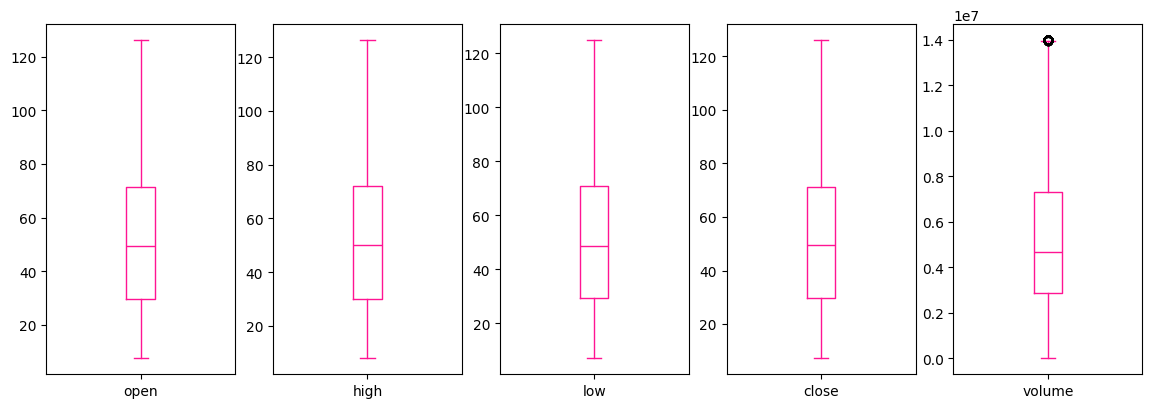

In [ ]:
#checking again if outliers got removed
Starbucks_Stock_Price.plot(kind='box', subplots=True,
        layout=(2,7),sharex=False,sharey=False, figsize=(20, 10), color='deeppink');

While the box plot still suggests our volume data variable now contains 1 outlier if we were to cut more variables we would end up replacing none outliers with nearest possible value, as such we shouldn't replace any more data values below 14,000,000 just to elimate 1 outlier.

In [ ]:
#Check data shape after outlier removal
Starbucks_Stock_Price.shape


(6639, 6)

# Step 11:Visualising Data Distribution after outlier removal

array([[<Axes: title={'center': 'volume'}>]], dtype=object)

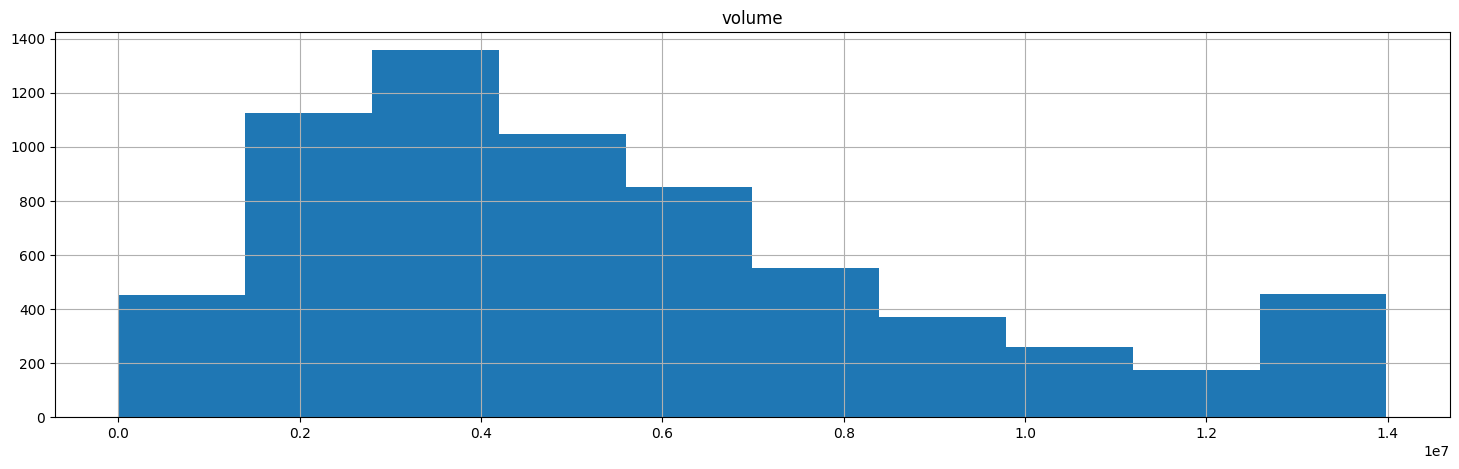

In [ ]:
Starbucks_Stock_Price.hist(['volume'], figsize=(18,5))

### Observation from step 11

The Distribution has improved after treatment, with the graph number having a large range that don't contain significant amounts of data variables.

# Step 12: Missing Values Analysis



In [ ]:
# Finding how many missing values are there for each column
Starbucks_Stock_Price.isnull().sum()

,0
datetime,0
open,0
high,0
low,0
close,0
volume,0


### Observations from Step 12: Missing Value Analysis

There is no missing data variables, so there isn't any need to remove any columns.

# Step 13: Feature Selection (Attribute Selection)

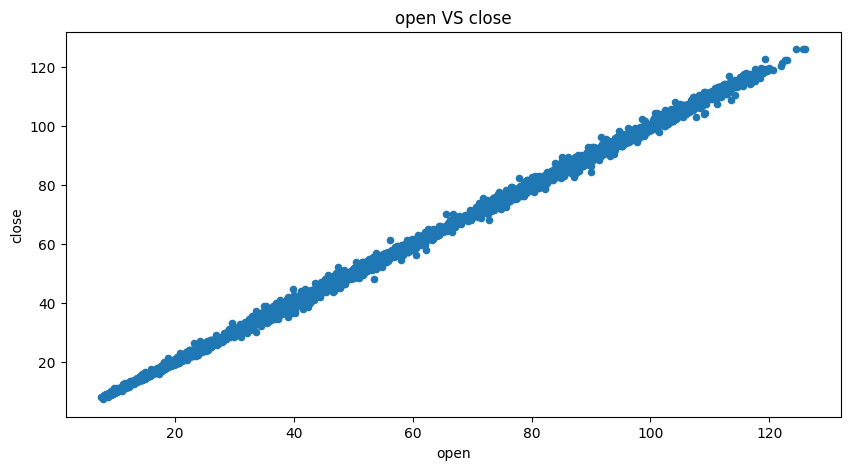

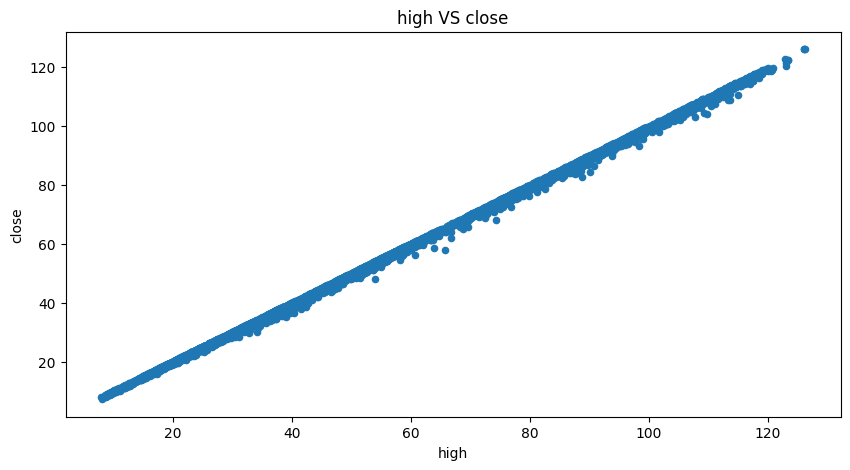

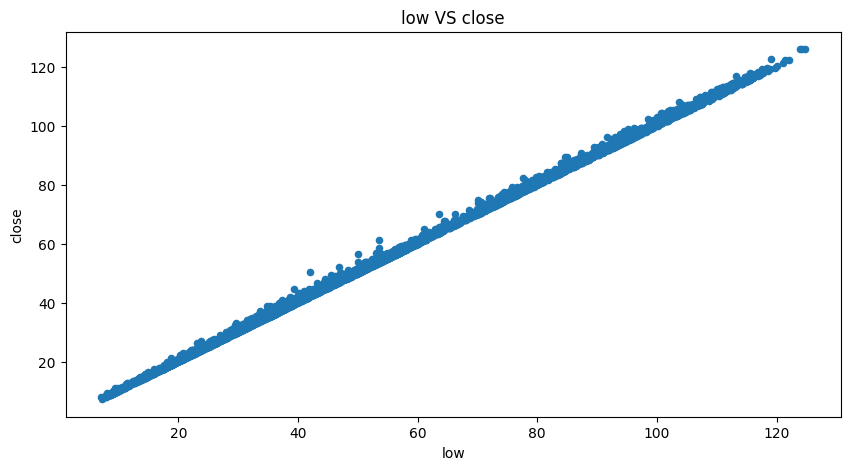

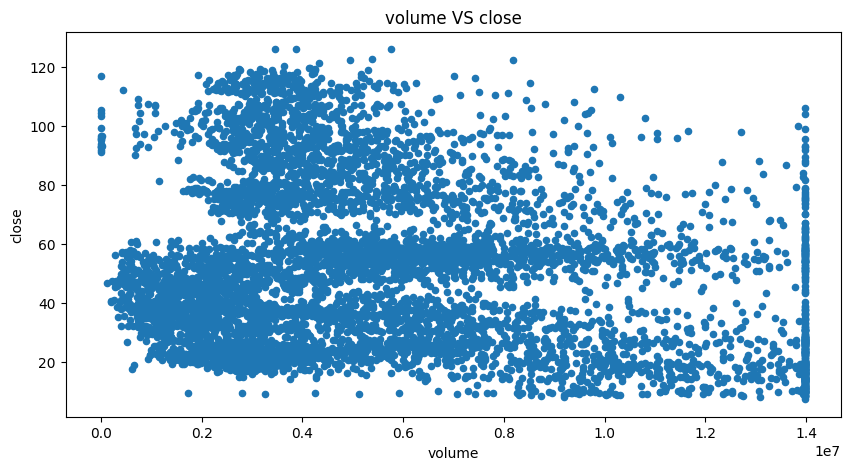

In [ ]:
# To find the best features(Columns) to predict the target variable, we display the tables of potential features
ContinuousCols=['open', 'high', 'low', 'volume']
# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
  Starbucks_Stock_Price.plot.scatter(x=predictor, y='close', figsize=(10,5), title=predictor+" VS "+ 'close')


# Step 14: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value



In [ ]:
# Calculating correlation matrix, to find which features correlate to target variable
ContinuousCols=['close','open', 'high', 'low', 'volume']
# Creating the correlation matrix
CorrelationData=Starbucks_Stock_Price[ContinuousCols].corr()
CorrelationData

,close,open,high,low,volume
close,1.000000,0.999524,0.999770,0.999762,-0.195170
open,0.999524,1.000000,0.999763,0.999742,-0.195193
high,0.999770,0.999763,1.000000,0.999640,-0.193498
low,0.999762,0.999742,0.999640,1.000000,-0.197301
volume,-0.195170,-0.195193,-0.193498,-0.197301,1.000000


In [ ]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['close'][abs(CorrelationData['close']) > 0.5 ]

,close
close,1.000000
open,0.999524
high,0.999770
low,0.999762


### Observation from step 14:

Final selected continous columns:
- 'open', 'high', 'low'

Note: Because close is the target variable itself

# Step 15: Relationship exploration: Categorical Vs Continuous -- Box Plots

Our dateset contains no categorical data, as such we can't carry out step 15.


In [ ]:
# # Box plots for continuous Target Variable "close" and Categorical predictors
# CategoricalColsList=['']
# import matplotlib.pyplot as plt
# fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))
# # Creating box plots for each continuous predictor against the Target Variable "close"
# for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
#   Starbucks_Stock_Price.boxplot(column='MEDV', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

# Step 16: Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

Our dateset contains no categorical data, as such we can't carry out step 16.

# Selecting final Predictors/Features for building Machine Learning/AI model.

Based on the previous tests with exploratory data analysis, we can select the predictor/columns for machine learning.

- 'open', 'high', 'low', 'datetime'

In [ ]:
SelectedColumns=['open', 'high','low', 'datetime']
# Selecting final columns
Starbucks_Stock_Price['datetime'] = pd.to_datetime(Starbucks_Stock_Price['datetime'])
DataForML=Starbucks_Stock_Price[SelectedColumns]
DataForML.head()

# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

# Step 17: Data Pre-processing for Machine Learning Model Building or Model Development

In [ ]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)
# Adding Target Variable to the data
DataForML_Numeric['close']=Starbucks_Stock_Price['close']
# Printing sample rows
DataForML_Numeric.head()

,open,high,low,datetime,close
0,38.38,38.63,37.31,1998-01-02,37.50
1,37.63,37.78,36.75,1998-01-05,37.13
2,37.13,37.38,35.56,1998-01-06,35.63
3,35.50,36.44,34.25,1998-01-07,34.69
4,34.56,36.01,34.00,1998-01-08,35.76


# Step 18: Machine Learning Model Development:

In [ ]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['open', 'high', 'low', 'datetime', 'close'], dtype='object')

In [ ]:
#Separate Target Variable and Predictor Variables
TargetVariable='close'
Predictors=['open', 'high', 'low'] #Date removed due to incompability with step 19
X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Step 19: Standardization/Normalization of data

In [ ]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results
# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4647, 3)
(4647,)
(1992, 3)
(1992,)


# Step 20: Multiple Linear Regression Algorithm For ML/AI model building



In [ ]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)
from sklearn import metrics

# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(TestingDataResults['close']-TestingDataResults['Predictedclose']))/TestingDataResults['close'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.9998140729775794

##### Model Validation and Accuracy Calculations ##########
       open      high       low   close  Predictedclose
0  0.334683  0.334741  0.337410   47.03            47.0
1  0.502530  0.509289  0.509469   68.15            68.0
2  0.119686  0.117801  0.122887   21.78            22.0
3  0.249663  0.251224  0.252144   37.44            37.0
4  0.875843  0.876457  0.870998  110.73           110.0
Mean Accuracy on test data: 99.10676785622135
Median Accuracy on test data: 99.35956084172004

Accuracy values for 10-fold Cross Validation:
 [98.95198403 99.15691543 99.5142357  99.45834753 99.18057654 99.54186981
 99.6078107  99.67039986 99.52543805 99.55595336]

Final Average Accuracy of the model: 99.42


# Step 21: AdaBoost Algorithm For ML/AI model building



In [ ]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)
from sklearn import metrics

# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['close']-TestingDataResults['Predictedclose']))/TestingDataResults['close'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

TypeError: AdaBoostRegressor.__init__() got an unexpected keyword argument 'base_estimator'